# Average Filter

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def addSaltnPepper(data, saltiness, spiceness):
    height,width = data.shape[:2]
    noise = np.zeros((height,width), data.dtype)
    cv2.randu(noise,0,255)        
    salt = noise > saltiness
    pepper = noise < spiceness
    
    img2 = data.copy()
    img2[salt] = 255
    img2[pepper] = 0
    return img2

In [11]:
imgfile = '../../db/jenny.jpg'
img= cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
height,width = img.shape[:2]

In [12]:
#Adds salt'n pepper noise
noisy = addSaltnPepper(img, 250,8)

#Applies the average filter with neighborhood 3x3
N = 3 #kernel/neighborhood size
kernel = np.ones((N,N), np.float32)/(N**2)
filtered = cv2.filter2D(noisy, cv2.CV_32F, kernel)


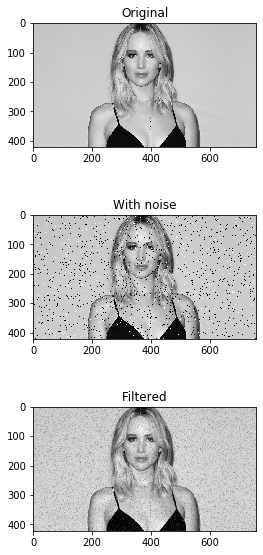

In [13]:
plt.figure(figsize=(4,10))
plt.subplot(311), plt.title('Original'), plt.imshow(img, cmap='gray')
plt.subplot(312), plt.title('With noise'), plt.imshow(noisy, cmap='gray')
plt.subplot(313), plt.title('Filtered'), plt.imshow(filtered, cmap='gray')
plt.show()